<span style="color:Black"><font size="6"> Computer-aided patients triage based on X_ray images </font></span> 

# Introduction
Theoreically, computer-aided [patients triage](https://en.wikipedia.org/wiki/Triage) system can perform a automatic initial interpretation of the periodontal condition of patients in a dental clinic. It can help to classify patients into different categories, severe periodontitis (more than 1/2 bone around the teeth root is lost, left image), moderate periodontits (1/3-1/2 bone is lost, middle image), mild periodontitis or healthy periodontal tissue (less than 1/3 bone is lost, right image). Based on this classification patients will be refered to an oral hygienist (mild periodontitis) or a general dentist (moderate periodontitis) or a specialist (severe periodotits).

 
<div align="center">severe periodontitis</div> |<div align='center'>moderate periodontitis</div>|<div align='center'>mild periodontitis or healthy </div> |
:-------------------------:|:-------------------------:|:------------------:
<img src="images/李梅s.jpg" width="300"/>| <img src="images/t-1m.jpg"  width="300"/>|  <img src="images/王鹏前牙x.jpg"  width="300"/>)    |

# Problem Formulation: 
- It's a Multi-class classification problem
- One set of X-ray image is one observation
- Label is a categorical variable, 0 for mild or healty, 1 for moderate and 2 for severe
- Train a PCA(or NMF) + SVC model by applying Hinge loss function to measure the quality of SVC
- Or implement a Neural Network based on a pretrained model (transfer learning). Use cross entropy loss function as train metric

# Pipeline
![](workflow_X_ray.jpg)

In [492]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import imageio
import glob

# Built up image arrays

In [106]:

# importing Image class from PIL package 
from PIL import Image 
  

In [87]:
tri_image_list = []
for filename in glob.glob('images/triple_image/*.jpg'):
    im = Image.open(filename)
    im = im.convert('L')
    im = im.resize((450,200))
    imarray = np.array(im)
    tri_image_list.append(imarray[:,:150])
    tri_image_list.append(imarray[:,150:300])
    tri_image_list.append(imarray[:,300:450])
#     image_ndarray.append(np.array(im))
# tiles = [im[x:x+M,y:y+N] for x in range(0,im.shape[0],M) for y in range(0,im.shape[1],N)]

In [128]:
len(tri_image_list)

24

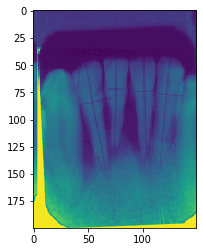

In [88]:
plt.imshow(tri_image_list[22])

In [95]:
single_image_list = []
for filename in glob.glob('images/single_image/*.jpg'):
    im = Image.open(filename)
    im = im.convert('L')
    im = im.resize((150,200))
    imarray = np.array(im)
    single_image_list.append(imarray)
#     image_ndarray.append(np.array(im))
# tiles = [im[x:x+M,y:y+N] for x in range(0,im.shape[0],M) for y in range(0,im.shape[1],N)]

In [96]:
len(single_image_list)

20

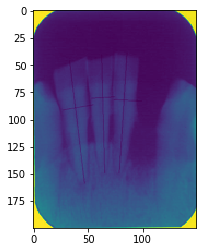

In [97]:
plt.imshow(single_image_list[9])

In [98]:
bi_image_list = []
for filename in glob.glob('images/double_image/*.jpg'):
    im = Image.open(filename)
    im = im.convert('L')
    im = im.resize((300,400))
    imarray = np.array(im)
    bi_image_list.append(imarray[0:200,0:150])
    bi_image_list.append(imarray[200:400,0:150])
    bi_image_list.append(imarray[0:200,150:300])
    bi_image_list.append(imarray[200:400,150:300])
    
#     image_ndarray.append(np.array(im))
# tiles = [im[x:x+M,y:y+N] for x in range(0,im.shape[0],M) for y in range(0,im.shape[1],N)]

In [99]:
print(len(bi_image_list))

20

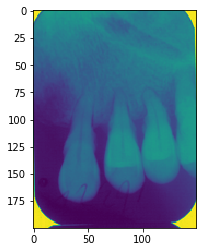

In [105]:
plt.imshow(bi_image_list[6])

In [211]:
hexa_image_list = []
for filename in glob.glob('images/*.jpg'):
    im = Image.open(filename)
    im = im.convert('L')
    im = im.resize((450,400))
    imarray = np.array(im)
    hexa_image_list.append(imarray[0:200,0:150])
    hexa_image_list.append(imarray[0:200,300:450])
    hexa_image_list.append(imarray[0:200,150:300])
    hexa_image_list.append(imarray[200:400,150:300])
    hexa_image_list.append(imarray[200:400,0:150])
    hexa_image_list.append(imarray[200:400,300:450])
    
#     image_ndarray.append(np.array(im))
# tiles = [im[x:x+M,y:y+N] for x in range(0,im.shape[0],M) for y in range(0,im.shape[1],N)]

In [469]:
print(len(hexa_image_list))

4098


In [311]:
temp_image_list=hexa_image_list+bi_image_list+single_image_list+tri_image_list

In [470]:
print(len(temp_image_list))    

4162


In [313]:
pixel_sum_list=[image.sum() for image in temp_image_list]

(array([6.94380889e-08, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.94380889e-08, 2.08314267e-07]),
 array([ 439067.    ,  442667.3295,  446267.659 , ..., 7632525.341 ,
        7636125.6705, 7639726.    ]),
 <a list of 2000 Patch objects>)

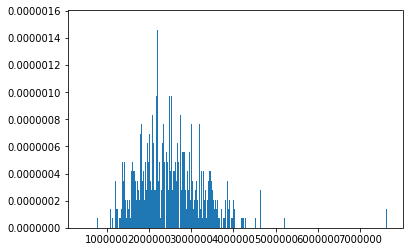

In [175]:
plt.hist(pixel_sum_list, density=True, bins=2000)

In [314]:
origin_image_list=[]
for i in temp_image_list:
    if i.sum()<6000000:
        origin_image_list.append(i)   

In [471]:
print(len(origin_image_list))

4089


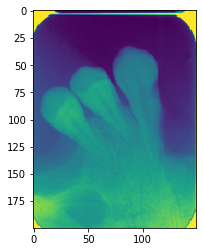

In [380]:
plt.imshow(origin_image_list[189])

In [317]:
#check the shape each image array
print(origin_image_list[150].shape)

(200, 150)

In [318]:
np.save('origin-image.npy',origin_image_list)

In [319]:
origin_image_array=np.load('origin-image.npy')

In [472]:
#demonstrate some images from the dataset
# fix,axes = plt.subplots(10,4,figsize=(15,60))
# for i,ax in zip(origin_image_array[4040:4050], axes.ravel()):
#     ax.imshow(i)

# Built up label variable

In [446]:
def split(word): 
    return [int(char) for char in word] 
severity_01=split('2222222222'+
                  '2200110022'+
                  '2222222111'+
                  '2222120022'+
                  '2222222101'+
                  '1111022000'+
                  '1111112221'+
                  '0100000022'+
                  '2211112102'+
                  '2122211111')

In [666]:
severity_02=split('1122222200'+
                  '0000000110'+
                  '1121211112'+
                  '2200000022'+
                  '2000222222'+
                  '2122121111'+
                  '1100021100'+
                  '0101000000'+
                  '2220022222'+
                  '2200010000')

In [448]:
severity_03=split('0001111010'+
                  '0010000000'+
                  '0222211000'+
                  '0002222221'+
                  '1121200000'+
                  '0212201122'+
                  '1111121112'+
                  '2222221211'+
                  '1000000222'+
                  '2212222220')

In [449]:
severity_04=split('0000000000'+
                  '0212211111'+
                  '0000000001'+
                  '2222222222'+
                  '0010002220'+
                  '1222222122'+
                  '2221000000'+
                  '0010001122'+
                  '2200111122'+
                  '2100000000')

In [450]:
severity_05=split('2222221111'+
                  '2111111122'+
                  '2222110211'+
                  '1201111111'+
                  '2200010011'+
                  '1111222200'+
                  '0000011111'+
                  '1000002221'+
                  '1011110000'+
                  '1111111000')

In [451]:
severity_06=split('2222220010'+
                  '0022222200'+
                  '0111000111'+
                  '2221111110'+
                  '0010000022'+
                  '2111101222'+
                  '0111000000'+
                  '0022222221'+
                  '1122222221'+
                  '1222222222')

In [452]:
severity_07=split('1211000000'+
                  '0000122000'+
                  '1110111110'+
                  '1101122222'+
                  '2222222122'+
                  '2221112221'+
                  '1111122222'+
                  '0000000001'+
                  '0000000011'+
                  '2000000000')

In [453]:
severity_08=split('0011111022'+
                  '2200000020'+
                  '0000000000'+
                  '0000000000'+
                  '0022121101'+
                  '1110221221'+
                  '1100002122'+
                  '1200000011'+
                  '1110111212'+
                  '1122221112')

In [454]:
severity_09=split('2222221100'+
                  '0111111111'+
                  '2112211022'+
                  '2210100000'+
                  '0000011111'+
                  '1111111111'+
                  '1111111222'+
                  '2222222222'+
                  '1111100111'+
                  '0000022211')

In [455]:
severity_10=split('2222000000'+
                  '1011112200'+
                  '0022202122'+
                  '2111222101'+
                  '1111221111'+
                  '1111201111'+
                  '1111000001'+
                  '1122122222'+
                  '2211122222'+
                  '2222122211')

In [456]:
#concatenate the first 100*10 labels(severity) as one list: severity_01_10
severity_01_10 = severity_01+severity_02+severity_03+severity_04+\
severity_05+severity_06+severity_07+severity_08+severity_09+severity_10
len(severity_01_10)

1000

In [667]:
#save the severity_01_10 list(the first 100*10 labels) as .npy file
np.save('severity-01-10.npy',severity_01_10)

In [389]:
severity_11=split('0111110122'+
                  '1211222221'+
                  '1222212222'+
                  '0000002222'+
                  '2202021211'+
                  '2200000000'+
                  '2121110000'+
                  '1111122111'+
                  '2221222222'+
                  '2012200000')

In [390]:
severity_12=split('0221111222'+
                  '2222222211'+
                  '1111112222'+
                  '2111111111'+
                  '1111222200'+
                  '0000100000'+
                  '1100012121'+
                  '1112222001'+
                  '1111111102'+
                  '2211111122')

In [391]:
severity_13=split('2111212122'+
                  '2220000000'+
                  '0110100000'+
                  '0202111212'+
                  '0111111112'+
                  '2211111222'+
                  '2222220110'+
                  '0012222222'+
                  '2221112111'+
                  '1122211111')

In [392]:
severity_14=split('1221122222'+
                  '1122121221'+
                  '1100000022'+
                  '2222111221'+
                  '0001111211'+
                  '1100000012'+
                  '1010112111'+
                  '2212122122'+
                  '2221221111'+
                  '2211222221')

In [393]:
severity_15=split('2222210000'+
                  '0000000000'+
                  '1100111111'+
                  '2222200000'+
                  '2121110011'+
                  '0000000011'+
                  '2211111211'+
                  '2211111221'+
                  '1121120000'+
                  '0022212221')

In [401]:
severity_16=split('2111211221'+
                  '2212120100'+
                  '1222211122'+
                  '2000000222'+
                  '1100011211'+
                  '2101112111'+
                  '0011110000'+
                  '0000000022'+
                  '2120000201'+
                  '2222200000')

In [403]:
severity_17=split('0000000001'+
                  '1112122221'+
                  '1111122222'+
                  '2200211111'+
                  '2222222222'+
                  '2222212221'+
                  '2110111011'+
                  '1010012220'+
                  '0022122211'+
                  '1001100000')

In [404]:
severity_18=split('0010110001'+
                  '1222200000'+
                  '0000101000'+
                  '0002222210'+
                  '0000022222'+
                  '1112221111'+
                  '2000000012'+
                  '1112122120'+
                  '1010000010'+
                  '0112222111')

In [405]:
severity_19=split('2221112112'+
                  '1112222222'+
                  '2211011100'+
                  '2212000000'+
                  '1121112222'+
                  '2221211100'+
                  '0012111100'+
                  '1222212222'+
                  '2222222111'+
                  '2220002221')

In [406]:
severity_20=split('1111111222'+
                  '2111000111'+
                  '1112222221'+
                  '1111111221'+
                  '1111001111'+
                  '1111111112'+
                  '2211121221'+
                  '2111212001'+
                  '1112222211'+
                  '0222111111')

In [407]:
#concatenate the second 100*10 labels(severity) as one list: severity_11_20
severity_11_20 = severity_11+severity_12+severity_13+severity_14+\
severity_15+severity_16+severity_17+severity_18+severity_19+severity_20
len(severity_11_20)

1000

In [408]:
#save the severity_01_10 list(the first 100*10 labels) as .npy file
np.save('severity-11-20.npy',severity_11_20)

In [409]:
severity_21=split('1111111011'+
                  '1111221111'+
                  '1111000111'+
                  '0000001122'+
                  '1122222111'+
                  '1111121111'+
                  '1011122222'+
                  '2222220000'+
                  '0011122100'+
                  '0111000100')

In [410]:
severity_22=split('2211210111'+
                  '1212221011'+
                  '1111121211'+
                  '1111212212'+
                  '1112110101'+
                  '1111221212'+
                  '2211111121'+
                  '1112211222'+
                  '1121121111'+
                  '1212222120')

In [411]:
severity_23=split('0000111221'+
                  '2110000111'+
                  '2110000000'+
                  '0000000000'+
                  '0111222122'+
                  '1111122212'+
                  '2211111111'+
                  '1111111022'+
                  '1111011111'+
                  '1111122221')

In [412]:
severity_24=split('2122122011'+
                  '1112221112'+
                  '2222210000'+
                  '0000000122'+
                  '2222222221'+
                  '1122111111'+
                  '1111001221'+
                  '1111121112'+
                  '2211222211'+
                  '1111112122')

In [413]:
severity_25=split('0022222212'+
                  '2211000000'+
                  '1111001112'+
                  '2211111122'+
                  '1111100011'+
                  '0000002122'+
                  '2111022211'+
                  '2000221221'+
                  '0012210000'+
                  '0022221211')

In [414]:
severity_26=split('0011111122'+
                  '2211112121'+
                  '2111111000'+
                  '0002222220'+
                  '0000022222'+
                  '2222200010'+
                  '0222101000'+
                  '0000000002'+
                  '2222200022'+
                  '0111212111')

In [415]:
severity_27=split('2222222211'+
                  '0101222222'+
                  '1002222221'+
                  '1111111100'+
                  '0111222112'+
                  '1111122211'+
                  '1111221010'+
                  '2211000001'+
                  '2211122222'+
                  '2111111000')

In [416]:
severity_28=split('1111102210'+
                  '0000011111'+
                  '1122111110'+
                  '2111112222'+
                  '2222212122'+
                  '1222222222'+
                  '2122111222'+
                  '2222222122'+
                  '2212222111'+
                  '1111111221')

In [417]:
severity_29=split('1122222222'+
                  '2111000000'+
                  '1112200110'+
                  '1000000111'+
                  '2221011112'+
                  '2222211010'+
                  '1001221000'+
                  '0002111101'+
                  '1111122111'+
                  '1111112221')

In [418]:
severity_30=split('1122222211'+
                  '1001000100'+
                  '0010012222'+
                  '2112210111'+
                  '1111121112'+
                  '1221122222'+
                  '1122222222'+
                  '2111000122'+
                  '2222112222'+
                  '2111111111')

In [419]:
#concatenate the third 100*10 labels(severity) as one list: severity_21_30
severity_21_30 = severity_21+severity_22+severity_23+severity_24+\
severity_25+severity_26+severity_27+severity_28+severity_29+severity_30
len(severity_21_30)

1000

In [420]:
#save the severity_01_10 list(the first 100*10 labels) as .npy file
np.save('severity-21-30.npy',severity_21_30)

In [431]:
severity_31=split('0010001111'+
                  '1122222100'+
                  '1110000011'+
                  '1111111111'+
                  '1222222222'+
                  '2121212221'+
                  '1111112211'+
                  '2000000122'+
                  '2222222221'+
                  '1111112222')

In [432]:
severity_32=split('2000000111'+
                  '1112222222'+
                  '2222212221'+
                  '1000101111'+
                  '1111121112'+
                  '1221200000'+
                  '0111220001'+
                  '1111121110'+
                  '0010111211'+
                  '1011111101')

In [433]:
severity_33=split('1112222220'+
                  '0011000000'+
                  '1111110011'+
                  '1100000002'+
                  '0000212221'+
                  '1111011212'+
                  '2211111111'+
                  '0221212222'+
                  '1111110000'+
                  '0011111122')

In [434]:
severity_34=split('2222222220'+
                  '1111100000'+
                  '0222212222'+
                  '2122222220'+
                  '0001111111'+
                  '0122211122'+
                  '2111222000'+
                  '0000112111'+
                  '1111111112'+
                  '1222221111')

In [435]:
severity_35=split('2221112222'+
                  '2211110111'+
                  '2211110111'+
                  '1212111221'+
                  '1111100000'+
                  '0222222122'+
                  '2211122200'+
                  '0000222211'+
                  '2222222211'+
                  '1112222222')

In [436]:
severity_36=split('2222211011'+
                  '1122222111'+
                  '1111121111'+
                  '1222210111'+
                  '0222001212'+
                  '2211111122'+
                  '2211000000'+
                  '1211112222'+
                  '2211222211'+
                  '1222121111')

In [437]:
severity_37=split('1112111112'+
                  '1200010011'+
                  '1212222122'+
                  '2222221111'+
                  '1100111011'+
                  '0211222222'+
                  '1122122222'+
                  '2111111111'+
                  '1221211112'+
                  '2222221211')

In [438]:
severity_38=split('1000111111'+
                  '0000000000'+
                  '0011111111'+
                  '1111222222'+
                  '2222222211'+
                  '1222222111'+
                  '2211111112'+
                  '2222111111'+
                  '2121111111'+
                  '1122222201')

In [439]:
severity_39=split('2111222212'+
                  '1222220100'+
                  '0010011111'+
                  '1112010100'+
                  '1222122112'+
                  '2222222211'+
                  '2222212111'+
                  '0000000111'+
                  '0111121121'+
                  '2222111121')

In [440]:
severity_40=split('1111111111'+
                  '1000000000'+
                  '0000000002'+
                  '2222211100'+
                  '0112111112'+
                  '2222211112'+
                  '2212101011'+
                  '2000000111'+
                  '2222222221'+
                  '1222211111')

In [441]:
severity_41=split('0000000222'+
                  '2212222221'+
                  '2211122222'+
                  '2222222222'+
                  '2222221200'+
                  '2122222211'+
                  '2222221122'+
                  '2222222222'+
                  '222222221')

In [442]:
#concatenate the first 100*10 labels(severity) as one list: severity_01_10
severity_31_41 = severity_31+severity_32+severity_33+severity_34+\
severity_35+severity_36+severity_37+severity_38+severity_39+severity_40+severity_41
len(severity_31_41)

1089

In [443]:
#save the severity_01_10 list(the first 100*10 labels) as .npy file
np.save('severity-31-41.npy',severity_31_41)

In [458]:
origin_severity=severity_01_10+severity_11_20+severity_21_30+severity_31_41
len(origin_severity)

4089

In [665]:
np.unique(severity_02)

array([0, 1, 2, 3])

In [460]:
assert len(origin_image_list)==len(origin_severity)

In [461]:
np.save('origin-severity.npy',origin_severity)

In [462]:
origin_severity_array=np.load('origin-severity.npy')

In [465]:
print(origin_severity_array.shape)
print(origin_image_array.shape)

(4089,)
(4089, 200, 150)


# Augment extreme images

In [476]:
index_extreme=[277,287,284,285,542,583,584,766,768,820,1278,1279,1297,1298,1299,1313,1315,1324,1541,1587,1613,1615,
               1745,1747,1775,1778,1780,1825,1968,1970,2062,2063,2044,2223,2311,2498,2502,2503,2573,2574,2575,2635,
               2636,2637,2647,2648,2736,2738,2926,3044,3046,3047,3048,3049,3239,3356,3359,3392,3611,3631,3640,3668,
               3792,3794,3974,3975,4046,4048,4049]
np.save('index-extreme',index_extreme)

In [519]:
extreme_image_list=[origin_image_list[i] for i in index_extreme]
extreme_severity=[origin_severity[i] for i in index_extreme]

In [520]:
print(len(extreme_image_list))
print(len(extreme_severity))

69
69


In [614]:
extreme_images = [Image.fromarray(im_array).convert('RGB') for im_array in extreme_image_list]

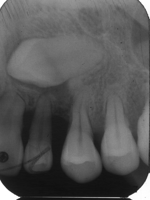

In [617]:
extreme_images[7]

In [618]:
from PIL import ImageFilter

In [ ]:
def blur(images):
    return [images[i].filter(ImageFilter.BoxBlur(2)) for i in range(len(images))]

In [619]:
blur_extreme_images=blur(extreme_images)

In [ ]:
def rotate_180(images):
    return [images[i].transpose(Image.ROTATE_180) for i in range(len(images))]

In [620]:
rotate_extreme_images=rotate_180(extreme_images)

In [ ]:
def edge_enhance(images):
    return [images[i].filter(ImageFilter.EDGE_ENHANCE) for i in range(len(images))]

In [621]:
edge_enhance_extreme_images=edge_enhance(extreme_images)

69


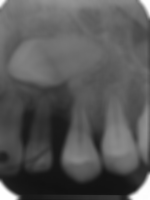

In [622]:
print(len(blur_extreme_images))
blur_extreme_images[7]

In [624]:
# print(len(rotate_extreme_images))
rotate_extreme_images[7]).shape

(200, 150, 3)

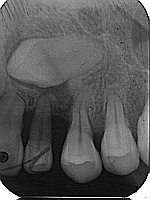

In [535]:
print(len(edge_enhance_extreme_images))
edge_enhance_extreme_images[7]

In [625]:
aug_extreme_images=blur_extreme_images+edge_enhance_extreme_images+rotate_extreme_images
len(aug_extreme_images)

207

In [626]:
aug_extreme_image_list=[np.array(im) for im in aug_extreme_images]
len(aug_extreme_image_list)

207

In [627]:
np.save('aug-extreme-images.npy',aug_extreme_image_list)

In [ ]:
aug_extreme_severity=extreme_severity*3

np.save('aug-extreme-severity.npy',aug_extreme_severity)

In [628]:
aug_extreme_image_array=np.load('aug-extreme-images.npy')
aug_extreme_severity=np.load('aug-extreme-severity.npy')

In [652]:
print(aug_extreme_severity.shape)
print(aug_extreme_image_array.shape)

(207,)
(207, 200, 150, 3)


# Augment original images

In [633]:
origin_images=[Image.fromarray(im_array).convert('RGB') for im_array in origin_image_list]

In [563]:
print(len(origin_images))

4089


In [634]:
def flip_lr(images):
    return [images[i].transpose(Image.FLIP_LEFT_RIGHT) for i in range(len(images))]
fliplr_origin_images=flip_lr(origin_images)
print(len(fliplr_origin_images))

4089


In [635]:
def flip_tb(images):
    return [images[i].transpose(Image.FLIP_TOP_BOTTOM) for i in range(len(images))]
fliptb_origin_images=flip_tb(origin_images)
print(len(fliptb_origin_images))

4089


In [636]:
fliplr_origin_image_list=[np.array(im) for im in fliplr_origin_images]
fliptb_origin_image_list=[np.array(im) for im in fliptb_origin_images]

In [640]:
origin_image_array_RGB=np.array([np.array(Image.fromarray(im_array).convert('RGB')) for im_array in origin_image_list])

In [ ]:
fliplr_origin_image_array=np.array(fliplr_origin_image_list)
fliptb_origin_image_array=np.array(fliptb_origin_image_list)

In [641]:
print(fliplr_origin_image_array.shape)
print(fliptb_origin_image_array.shape)
print(origin_image_array_RGB.shape)

(4089, 200, 150, 3)
(4089, 200, 150, 3)
(4089, 200, 150, 3)


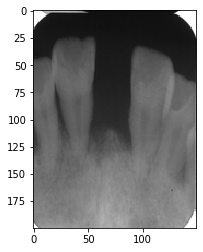

In [645]:
plt.imshow(fliplr_origin_image_array[9])

# Images all together

In [655]:
images=np.concatenate((fliplr_origin_image_array,fliptb_origin_image_array,\
                      origin_image_array_RGB),axis=0)

In [648]:
severity=np.concatenate((origin_severity,origin_severity,origin_severity),axis=0)

In [649]:
print(images.shape)
print(severity.shape)

(12267, 200, 150, 3)
(12267,)


In [656]:
images=np.concatenate((images,aug_extreme_image_array),axis=0)

In [651]:
severity=np.concatenate((severity,aug_extreme_severity),axis=0)

In [668]:
severity=np.where(severity==3, 2, severity) 

In [669]:
print(images.shape)
print(severity.shape)

(12474, 200, 150, 3)
(12474,)


In [658]:
np.save('images.npy',images)

In [670]:
np.save('severity.npy',severity)

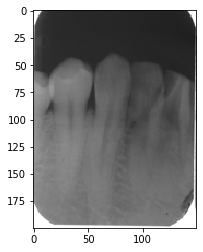

In [659]:
plt.imshow(images[1035])

In [660]:
severity[1035]

0

In [672]:
# %load plot-history.py
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
# plot validation accuracy
plt.plot(history.history['val_' + 'accuracy'])
# set title
plt.title('accuracy vs epoch')
# set x and y axis labels
plt.ylabel('accuracy')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper left')
# display the plot
plt.show()

###-----plot loss---------------
# plot training loss
plt.plot(history.history['loss'])
# plot validation loss
plt.plot(history.history['val_loss'])
# set title
plt.title('loss vs epochs')
# set x and y axis labels
plt.ylabel('loss')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper right')
# display the plot
plt.show()

NameError: name 'history' is not defined

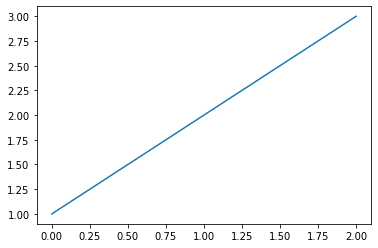

<Figure size 432x288 with 0 Axes>

In [676]:
plt.plot([1,2,3])
plt.show()
plt.savefig('aa')